# DataSet Information:

Data is from the website :

https://archive.ics.uci.edu/ml/datasets/Census+Income

# Objective:

Predict whether a person earns over 50K a year

# Target

**Income**: >50K, <=50K. 

# Features

**age**: continuous. 

**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
fnlwgt: continuous. 

**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 

**education-num**: continuous. 

**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 

**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 

**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 

**sex**: Female, Male. 

**capital-gain**: continuous. 

**capital-loss**: continuous. 

**hours-per-week**: continuous.

**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv('../Projekt/Census_Income_DataSet_Total.csv', delimiter=', ')

C:\Users\piotr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [6]:
data.shape

(48842, 15)

In [7]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


** Preprocessing data **

In [8]:
data.rename(columns = {'ď»żage': 'age',
                       'marital-status': 'marital_status', 
                       'capital-gain': 'capital_gain',
                       'capital-loss': 'capital_loss',
                       'hours-per-week': 'hours_per_week',
                       'native-country' : 'native_country'}
                        ,inplace = True) # rename column

data = data.drop(columns='education', axis = 1 ) # delete the education column, becuase the education-num column includes the same information
data = data.drop(columns = 'fnlwgt', axis = 1)  # delete this column

data.Income = data.Income.map({'<=50K':0, '<=50K.':0 ,'>50K':1, '>50K.':1}) #change Income column on dtypes int64

In [9]:
pd.crosstab(data['workclass'], data['Income'])

Income,0,1
workclass,,
?,2534,265
Federal-gov,871,561
Local-gov,2209,927
Never-worked,10,0
Private,26519,7387
Self-emp-inc,757,938
Self-emp-not-inc,2785,1077
State-gov,1451,530
Without-pay,19,2


In [10]:
data['workclass'].replace(['Self-emp-not-inc', 'Self-emp-inc'], 
                          'Self_employed', inplace = True)

data['workclass'].replace(['Local-gov', 'Federal-gov', 'State-gov'], 
                          'Government', inplace = True)

data['workclass'].replace(['Never-worked', 'Without-pay'], 
                          'Unemployed', inplace = True) 

data['workclass'].replace('?', 'Other', inplace = True)

In [11]:
pd.crosstab(data['workclass'], data['Income'])

Income,0,1
workclass,,
Government,4531,2018
Other,2534,265
Private,26519,7387
Self_employed,3542,2015
Unemployed,29,2


In [12]:
pd.crosstab(data['marital_status'], data['Income'])

Income,0,1
marital_status,,
Divorced,5962,671
Married-AF-spouse,23,14
Married-civ-spouse,12395,9984
Married-spouse-absent,570,58
Never-married,15384,733
Separated,1431,99
Widowed,1390,128


In [13]:
data['marital_status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 
                               'Married', inplace = True)

data['marital_status'].replace(['Divorced', 'Separated', 'Widowed', 'Married-spouse-absent'], 
                               'Not-Married', inplace = True)

In [14]:
pd.crosstab(data['marital_status'], data['Income'])

Income,0,1
marital_status,,
Married,12418,9998
Never-married,15384,733
Not-Married,9353,956


In [15]:
pd.crosstab(data['occupation'], data['Income'])

Income,0,1
occupation,,
?,2544,265
Adm-clerical,4843,768
Armed-Forces,10,5
Craft-repair,4729,1383
Exec-managerial,3178,2908
Farming-fishing,1317,173
Handlers-cleaners,1934,138
Machine-op-inspct,2650,372
Other-service,4719,204


In [16]:
data['occupation'].replace('?', 'Other-service', inplace = True)

In [17]:
pd.crosstab(data['occupation'], data['Income'])

Income,0,1
occupation,,
Adm-clerical,4843,768
Armed-Forces,10,5
Craft-repair,4729,1383
Exec-managerial,3178,2908
Farming-fishing,1317,173
Handlers-cleaners,1934,138
Machine-op-inspct,2650,372
Other-service,7263,469
Priv-house-serv,239,3


In [18]:
pd.crosstab(data['relationship'], data['Income'])

Income,0,1
relationship,,
Husband,10870,8846
Not-in-family,11307,1276
Other-relative,1454,52
Own-child,7470,111
Unmarried,4816,309
Wife,1238,1093


In [19]:
pd.crosstab(data['native_country'], data['Income'])

Income,0,1
native_country,,
?,637,220
Cambodia,19,9
Canada,119,63
China,86,36
Columbia,81,4
Cuba,104,34
Dominican-Republic,98,5
Ecuador,39,6
El-Salvador,144,11


In [20]:
data['native_country'].replace (['Cambodia', 'China', 'Hong', 'India', 'Iran', 'Japan', 'Laos', 'Philippines', 'Taiwan', 'Thailand', 'Vietnam'], 
                                'Asia', inplace=True)

data['native_country'].replace (['Canada', 'Outlying-US(Guam-USVI-etc)', 'United-States'],
                                'North America', inplace = True)

data['native_country'].replace (['Columbia', 'Ecuador', 'Peru'],
                                'South America', inplace = True)

data['native_country'].replace (['Cuba', 'Dominican-Republic', 'El-Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Puerto-Rico', 'Trinadad&Tobago'],
                                'Central America', inplace = True)

data['native_country'].replace(['England', 'France', 'Germany', 'Greece', 'Holand-Netherlands', 'Hungary', 'Ireland', 'Italy', 'Poland', 'Portugal', 'Scotland', 'Yugoslavia'],
                               'Europe', inplace = True)

data['native_country'].replace(['South', '?'], 
                               'Other',  inplace = True)

In [21]:
pd.crosstab(data['native_country'], data['Income'])

Income,0,1
native_country,,
Asia,687,294
Central America,1745,151
Europe,550,230
North America,33279,10758
Other,732,240
South America,162,14


In [22]:
data.describe() 

,age,education-num,capital_gain,capital_loss,hours_per_week,Income
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [22]:
data.head()

,age,workclass,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,39,Government,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North America,0
1,50,Self_employed,13,Married,Exec-managerial,Husband,White,Male,0,0,13,North America,0
2,38,Private,9,Not-Married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North America,0
3,53,Private,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,North America,0
4,28,Private,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Central America,0


In [23]:
y = data.pop('Income')

In [24]:
data_categorics = data.select_dtypes(include=object)  # only categorics features
data_numerics = data.select_dtypes(include = [np.int64])  # only numerics features 

data_numerics_DF = pd.DataFrame(data=data_numerics, columns=data_numerics.columns, index=data_numerics.index)

categorical_dummies = pd.get_dummies(data_categorics)

X  = pd.concat([data_numerics_DF, categorical_dummies], axis=1)  # new dataframe

In [25]:
X.head()

,age,education-num,capital_gain,capital_loss,hours_per_week,workclass_Government,workclass_Other,workclass_Private,workclass_Self_employed,workclass_Unemployed,...,race_Other,race_White,sex_Female,sex_Male,native_country_Asia,native_country_Central America,native_country_Europe,native_country_North America,native_country_Other,native_country_South America
0,39,13,2174,0,40,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


** Split dataset **

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state = 123)

In [27]:
X_train.shape, X_test.shape

((34189, 46), (14653, 46))

**Logistic Regression, Naive Bayes, Decision Tree, Random Forest and XGBoost**

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import time

In [31]:
models = [[("standarization", StandardScaler()),("model", LogisticRegression())],
          [("model", MultinomialNB() )],
          [('model', DecisionTreeClassifier() ) ],
          [("model", RandomForestClassifier())],
          [("model", XGBClassifier())]]
          

param_grids = [{'model__penalty': ['l1', 'l2'], 'model__C': [1, 0.1]},
               {},
               {'model__max_depth': [5, 7, 10], 'model__min_samples_leaf': [5, 10, 15]},
               {"model__n_estimators": [100, 150, 200], 'model__max_depth': [5, 7, 10] ,"model__min_samples_leaf": [5, 10, 15]},
               {"model__learning_rate":[0.1, 0.2], "model__n_estimators": [100, 150, 200], "model__max_depth":[5, 7, 10], 'model__min_child_weight':[5, 10, 15]}]



In [32]:
results_train = {}
results_test = {}

for pipe, params in zip(models,param_grids):
    
    inference_start = time.time()
    
    pipeline = Pipeline(pipe)     
   
    gs = GridSearchCV(estimator=pipeline, param_grid=params, cv=10, n_jobs=-1, scoring = "accuracy")
    gs.fit(X_train,y_train)
    
    result_train = accuracy_score(y_pred=gs.best_estimator_.predict(X_train), y_true=y_train)
    results_train.update({gs.best_estimator_:result_train})   
    #print({gs.best_estimator_:result_train})
    
    result_test = accuracy_score(y_pred=gs.best_estimator_.predict(X_test), y_true=y_test)
    results_test.update({gs.best_estimator_:result_test})
    #print({gs.best_estimator_:result_test})
    
    inference_end = time.time()
    
    print(gs.best_estimator_)
    print('Inference Time: %0.2f Minutes'%((inference_end - inference_start)/60))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to f

Pipeline(memory=None,
     steps=[('standarization', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])
Inference Time: 2.53 Minutes
Pipeline(memory=None,
     steps=[('model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])
Inference Time: 0.01 Minutes
Pipeline(memory=None,
     steps=[('model', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])
Inference Time: 0.12 Minutes
Pipeline(memory=None,
  

** Accuracy_score **

In [33]:
results_list_train = []
results_list_train.append (results_train)
df_train = pd.DataFrame(data=results_list_train).T
df_train.columns=['accuracy_train']

df_train

,accuracy_train
"Pipeline(memory=None,\n steps=[('standarization', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='warn',\n n_jobs=None, penalty='l1', random_state=None, solver='warn',\n tol=0.0001, verbose=0, warm_start=False))])",0.850624
"Pipeline(memory=None,\n steps=[('model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])",0.779403
"Pipeline(memory=None,\n steps=[('model', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=10, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort=False, random_state=None,\n splitter='best'))])",0.866624
"Pipeline(memory=None,\n steps=[('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=10, max_features='auto', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=5, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,\n oob_score=False, random_state=None, verbose=0,\n warm_start=False))])",0.862734
"Pipeline(memory=None,\n steps=[('model', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,\n max_depth=7, min_child_weight=15, missing=None, n_estimators=100,\n n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,\n reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,\n silent=True, subsample=1))])",0.878850


In [34]:
results_list_test = []
results_list_test.append (results_test)
df_test = pd.DataFrame(data=results_list_test).T
df_test.columns=['accuracy_test']

df_test

,accuracy_test
"Pipeline(memory=None,\n steps=[('standarization', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='warn',\n n_jobs=None, penalty='l1', random_state=None, solver='warn',\n tol=0.0001, verbose=0, warm_start=False))])",0.854706
"Pipeline(memory=None,\n steps=[('model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])",0.782502
"Pipeline(memory=None,\n steps=[('model', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=10, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort=False, random_state=None,\n splitter='best'))])",0.862008
"Pipeline(memory=None,\n steps=[('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=10, max_features='auto', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=5, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,\n oob_score=False, random_state=None, verbose=0,\n warm_start=False))])",0.862827
"Pipeline(memory=None,\n steps=[('model', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,\n max_depth=7, min_child_weight=15, missing=None, n_estimators=100,\n n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,\n reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,\n silent=True, subsample=1))])",0.874838


In [35]:
df = df_train.join(df_test, how = "inner" )

df

,accuracy_train,accuracy_test
"Pipeline(memory=None,\n steps=[('standarization', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='warn',\n n_jobs=None, penalty='l1', random_state=None, solver='warn',\n tol=0.0001, verbose=0, warm_start=False))])",0.850624,0.854706
"Pipeline(memory=None,\n steps=[('model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])",0.779403,0.782502
"Pipeline(memory=None,\n steps=[('model', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=10, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort=False, random_state=None,\n splitter='best'))])",0.866624,0.862008
"Pipeline(memory=None,\n steps=[('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=10, max_features='auto', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=5, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,\n oob_score=False, random_state=None, verbose=0,\n warm_start=False))])",0.862734,0.862827
"Pipeline(memory=None,\n steps=[('model', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,\n max_depth=7, min_child_weight=15, missing=None, n_estimators=100,\n n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,\n reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,\n silent=True, subsample=1))])",0.878850,0.874838


In [40]:
gs.best_params_

{'model__learning_rate': 0.2,
 'model__max_depth': 7,
 'model__min_child_weight': 15,
 'model__n_estimators': 100}

**Classification report**

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

print (classification_report(y_pred=gs.best_estimator_.predict(X_test), y_true=y_test)) 

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     11166
           1       0.79      0.64      0.71      3487

   micro avg       0.87      0.87      0.87     14653
   macro avg       0.84      0.79      0.81     14653
weighted avg       0.87      0.87      0.87     14653



**ROC CURVE**

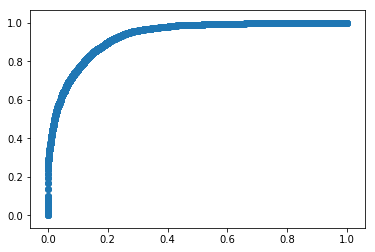

In [38]:
from sklearn.metrics import roc_curve
probability = gs.best_estimator_.predict_proba (X_test)[:,1]
roc_results = roc_curve(y_true=y_test, y_score=probability)
fpr, tpr, _ = roc_results

from matplotlib import pyplot as plt
plt.scatter (fpr, tpr)
plt.show()

**ROC AUC SCORE**

In [39]:
from sklearn.metrics import roc_auc_score

np.round(roc_auc_score(y_score=gs.best_estimator_.predict(X_test), y_true=y_test),2)

0.79

**The feature_importances **

In [51]:
from xgboost import plot_importance
from matplotlib import pyplot as plt

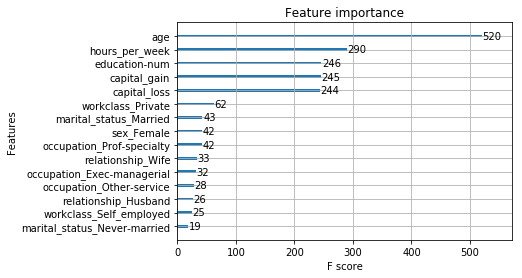

In [52]:
plot_importance(booster=gs.best_estimator_.steps[0][1], max_num_features=15, importance_type='weight')

Age, hours per week, education-num, capital gain and capitall loss are used mostly to split the data across all trees.

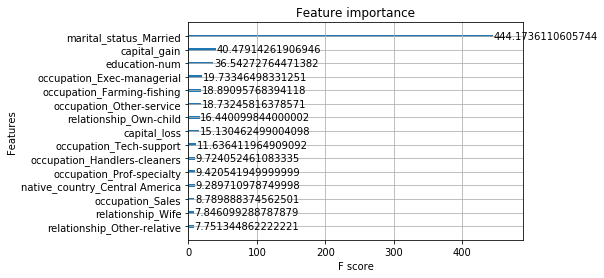

In [54]:
plot_importance(booster=gs.best_estimator_.steps[0][1], max_num_features=15, importance_type='gain')

marital_status_Married, capital_gain, education_num give the most gain cross all splits the features are used

# RandomizedSearchCV for XGBoost - less time-consuming ?

In [57]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

In [61]:
estimator = XGBClassifier(n_jobs = -1)

param_distributions_XGB = {"learning_rate":[0.1, 0.2], 
                           "n_estimators": [100, 150, 200], 
                           "max_depth":[5, 7, 10], 
                           'min_child_weight':[5, 10, 15]}

In [62]:
results_XGB_train = {}
results_XGB_test = {}

In [63]:
inference_start = time.time()

rs_XGB = RandomizedSearchCV (estimator=estimator, param_distributions=param_distributions_XGB, cv = 10, n_iter = 5, scoring="accuracy")

rs_XGB.fit(X_train, y_train)

result_train = accuracy_score(y_pred=rs_XGB.best_estimator_.predict(X_train), y_true=y_train)
results_XGB_train.update({rs_XGB.best_estimator_:result_train})

result_test = accuracy_score(y_pred=rs_XGB.best_estimator_.predict(X_test), y_true=y_test )
results_XGB_test.update({rs_XGB.best_estimator_:result_test})

inference_end = time.time()

print('Inference Time: %0.2f Minutes'%((inference_end - inference_start)/60))

Inference Time: 16.91 Minutes


In [65]:
result_XGB_train = []
result_XGB_train.append(results_XGB_train)

df_XGB_train = pd.DataFrame(data=result_XGB_train).T
df_XGB_train.columns = ["accuracy_test"]

df_XGB_train

,accuracy_test
"XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,\n max_depth=7, min_child_weight=5, missing=None, n_estimators=100,\n n_jobs=-1, nthread=None, objective='binary:logistic',\n random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,\n seed=None, silent=True, subsample=1)",0.878002


In [66]:
result_XGB_test= []
result_XGB_test.append(results_XGB_test)

df_XGB_test = pd.DataFrame(data=result_XGB_test).T
df_XGB_test.columns = ["accuracy_train"]

df_XGB_test

,accuracy_train
"XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,\n max_depth=7, min_child_weight=5, missing=None, n_estimators=100,\n n_jobs=-1, nthread=None, objective='binary:logistic',\n random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,\n seed=None, silent=True, subsample=1)",0.873064


In [67]:
df_XGB = df_XGB_train.join(df_XGB_test, how="inner")

df_XGB

,accuracy_test,accuracy_train
"XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,\n max_depth=7, min_child_weight=5, missing=None, n_estimators=100,\n n_jobs=-1, nthread=None, objective='binary:logistic',\n random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,\n seed=None, silent=True, subsample=1)",0.878002,0.873064


In [64]:
rs_XGB.best_params_

{'n_estimators': 100,
 'min_child_weight': 5,
 'max_depth': 7,
 'learning_rate': 0.1}

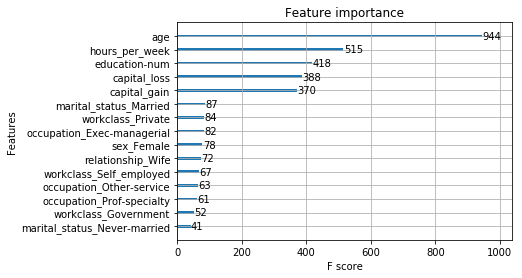

In [68]:
plot_importance(booster=rs_XGB.best_estimator_, max_num_features=15, importance_type='weight')

Age, hours per week, education-num, capital gain and capital loss are used mostly to split the data across all trees - the same as in GridSearch

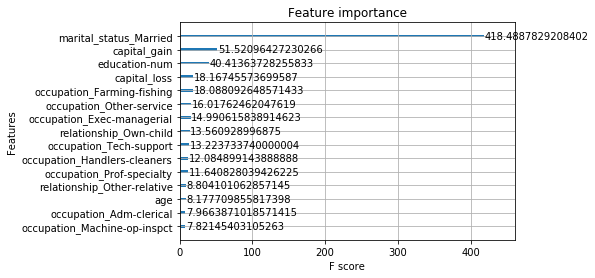

In [69]:
plot_importance(booster=rs_XGB.best_estimator_, max_num_features=15, importance_type='gain')

marital_status_Married, capital_gain, education_num give the most gain cross all splits the features are used - the same as in GridSearch

** CONCLUSION - We should use RandomizedSearchCV for XGBooost **

# NEURAL NETWORK KERAS

In [71]:
import keras

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import SGD
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_NN = scaler.fit_transform(X_train)
X_test_NN = scaler.transform(X_test)

n_cols = X_train_NN.shape[1]

y_train_NN = to_categorical(y_train)
y_test_NN = to_categorical(y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [73]:
# Model1

In [74]:
# Set up the model
model = Sequential()

# Adding layers
model.add(Dense(64, activation = 'relu', input_shape = (n_cols,) ))
model.add(Dense(2, activation = 'softmax'))

# Model compile
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Early stopping
Early_stopping_monitor = [
            EarlyStopping(patience = 2, min_delta = 0.001),
            #ModelCheckpoint(filepath='./my_nn_model.h5', save_best_only=True)
            #ModelCheckpoint(filepath='weights.{epoch:02d}-{val_loss:.4f}.hdf5', save_best_only=True)            
]

# Fit the model
model.fit(X_train_NN, y_train_NN, validation_split = 0.3, epochs = 30, verbose = 2 )
          #,callbacks = Early_stopping_monitor)

Train on 23932 samples, validate on 10257 samples
Epoch 1/30
 - 2s - loss: 0.3800 - acc: 0.8203 - val_loss: 0.3582 - val_acc: 0.8341
Epoch 2/30
 - 1s - loss: 0.3426 - acc: 0.8383 - val_loss: 0.3354 - val_acc: 0.8411
Epoch 3/30
 - 1s - loss: 0.3326 - acc: 0.8439 - val_loss: 0.3286 - val_acc: 0.8471
Epoch 4/30
 - 1s - loss: 0.3262 - acc: 0.8472 - val_loss: 0.3221 - val_acc: 0.8516
Epoch 5/30
 - 1s - loss: 0.3232 - acc: 0.8499 - val_loss: 0.3284 - val_acc: 0.8438
Epoch 6/30
 - 1s - loss: 0.3213 - acc: 0.8493 - val_loss: 0.3195 - val_acc: 0.8509
Epoch 7/30
 - 1s - loss: 0.3196 - acc: 0.8509 - val_loss: 0.3204 - val_acc: 0.8495
Epoch 8/30
 - 1s - loss: 0.3184 - acc: 0.8520 - val_loss: 0.3240 - val_acc: 0.8481
Epoch 9/30
 - 1s - loss: 0.3166 - acc: 0.8538 - val_loss: 0.3175 - val_acc: 0.8507
Epoch 10/30
 - 1s - loss: 0.3159 - acc: 0.8525 - val_loss: 0.3190 - val_acc: 0.8527
Epoch 11/30
 - 1s - loss: 0.3146 - acc: 0.8534 - val_loss: 0.3182 - val_acc: 0.8511
Epoch 12/30
 - 1s - loss: 0.3141 - 

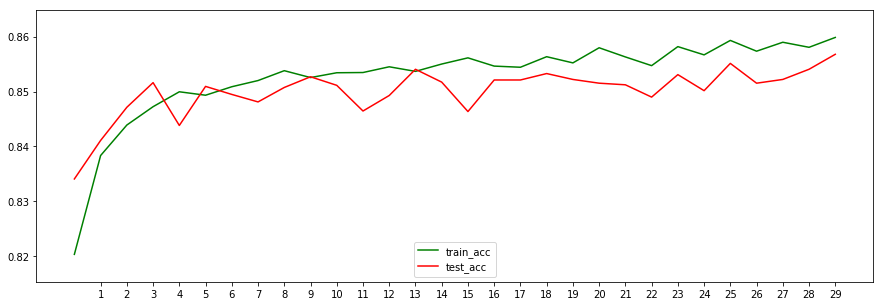

In [75]:
plt.figure(figsize=(15,5))

plt.plot(model.history.history['acc'], label = 'train_acc', color = 'g')
plt.plot(model.history.history['val_acc'], label = 'test_acc', color = 'r')

plt.ylim(bottom = min(model.history.history['acc'] + model.history.history['val_acc']) - 0.005, 
         top = max(model.history.history['acc'] + model.history.history['val_acc']) + 0.005)

plt.xticks(range(min(model.history.epoch) + 1, max(model.history.epoch)+1))

plt.legend(loc = "lower center")

plt.show()

In [76]:
# Evaluate the model

train_loss, train_acc = model.evaluate(X_train_NN, y_train_NN)
test_loss, test_acc = model.evaluate(X_test_NN, y_test_NN)

print('Train acc: %.3f, Test acc: %.3f' % (train_acc, test_acc))

14653/14653 [==============================] - 0s 22us/step
Train acc: 0.860, Test acc: 0.855


In [77]:
# Model2

In [78]:
# Set up the model
model = Sequential()

# Adding layers
model.add(Dense(128, activation = 'relu', input_shape = (n_cols,) ))
model.add(Dense(2, activation = 'softmax'))

# Model compile
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Early stopping
Early_stopping_monitor = [
            EarlyStopping(patience = 2, min_delta = 0.001),
            #ModelCheckpoint(filepath='./my_nn_model.h5', save_best_only=True)
            #ModelCheckpoint(filepath='weights.{epoch:02d}-{val_loss:.4f}.hdf5', save_best_only=True)            
]

# Fit the model
model.fit(X_train_NN, y_train_NN, validation_split = 0.3, epochs = 30, verbose = 2 )
          #,callbacks = Early_stopping_monitor)


Train on 23932 samples, validate on 10257 samples
Epoch 1/30
 - 1s - loss: 0.3674 - acc: 0.8258 - val_loss: 0.3418 - val_acc: 0.8355
Epoch 2/30
 - 1s - loss: 0.3365 - acc: 0.8406 - val_loss: 0.3312 - val_acc: 0.8458
Epoch 3/30
 - 1s - loss: 0.3273 - acc: 0.8467 - val_loss: 0.3361 - val_acc: 0.8421
Epoch 4/30
 - 1s - loss: 0.3231 - acc: 0.8486 - val_loss: 0.3313 - val_acc: 0.8419
Epoch 5/30
 - 1s - loss: 0.3209 - acc: 0.8494 - val_loss: 0.3188 - val_acc: 0.8498
Epoch 6/30
 - 1s - loss: 0.3194 - acc: 0.8503 - val_loss: 0.3196 - val_acc: 0.8509
Epoch 7/30
 - 1s - loss: 0.3166 - acc: 0.8528 - val_loss: 0.3185 - val_acc: 0.8516
Epoch 8/30
 - 1s - loss: 0.3155 - acc: 0.8522 - val_loss: 0.3178 - val_acc: 0.8520
Epoch 9/30
 - 1s - loss: 0.3133 - acc: 0.8537 - val_loss: 0.3233 - val_acc: 0.8456
Epoch 10/30
 - 1s - loss: 0.3123 - acc: 0.8547 - val_loss: 0.3179 - val_acc: 0.8497
Epoch 11/30
 - 1s - loss: 0.3111 - acc: 0.8550 - val_loss: 0.3161 - val_acc: 0.8546
Epoch 12/30
 - 1s - loss: 0.3099 - 

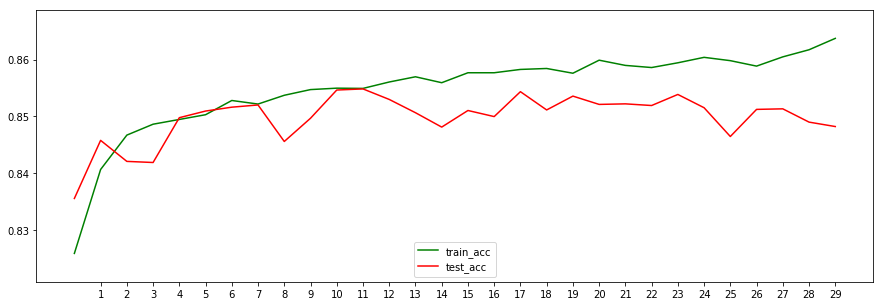

In [79]:
plt.figure(figsize=(15,5))

plt.plot(model.history.history['acc'], label = 'train_acc', color = 'g')
plt.plot(model.history.history['val_acc'], label = 'test_acc', color = 'r')

plt.ylim(bottom = min(model.history.history['acc'] + model.history.history['val_acc']) - 0.005, 
         top = max(model.history.history['acc'] + model.history.history['val_acc']) + 0.005)

plt.xticks(range(min(model.history.epoch) + 1, max(model.history.epoch)+1))

plt.legend(loc = "lower center")

plt.show()

In [80]:
# Evaluate the model

train_loss, train_acc = model.evaluate(X_train_NN, y_train_NN)
test_loss, test_acc = model.evaluate(X_test_NN, y_test_NN)

print('Train acc: %.3f, Test acc: %.3f' % (train_acc, test_acc))

14653/14653 [==============================] - 0s 15us/step
Train acc: 0.857, Test acc: 0.849


In [81]:
# Model3

In [82]:
# Set up the model
model = Sequential()

# Adding layers
model.add(Dense(64, activation = 'relu', input_shape = (n_cols,) ))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

# Model compile
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Early stopping

Early_stopping_monitor = [
            EarlyStopping(patience = 2, min_delta = 0.001),
            #ModelCheckpoint(filepath='./my_nn_model.h5', save_best_only=True)
            #ModelCheckpoint(filepath='weights.{epoch:02d}-{val_loss:.4f}.hdf5', save_best_only=True)            
]

# Fit the model
model.fit(X_train_NN, y_train_NN, validation_split = 0.3, epochs = 30, verbose = 2 )
          #,callbacks = Early_stopping_monitor)


Train on 23932 samples, validate on 10257 samples
Epoch 1/30
 - 1s - loss: 0.3750 - acc: 0.8225 - val_loss: 0.3543 - val_acc: 0.8337
Epoch 2/30
 - 1s - loss: 0.3371 - acc: 0.8418 - val_loss: 0.3278 - val_acc: 0.8488
Epoch 3/30
 - 1s - loss: 0.3293 - acc: 0.8474 - val_loss: 0.3246 - val_acc: 0.8495
Epoch 4/30
 - 1s - loss: 0.3233 - acc: 0.8494 - val_loss: 0.3205 - val_acc: 0.8502
Epoch 5/30
 - 1s - loss: 0.3205 - acc: 0.8505 - val_loss: 0.3198 - val_acc: 0.8514
Epoch 6/30
 - 1s - loss: 0.3193 - acc: 0.8519 - val_loss: 0.3182 - val_acc: 0.8519
Epoch 7/30
 - 1s - loss: 0.3155 - acc: 0.8530 - val_loss: 0.3190 - val_acc: 0.8514
Epoch 8/30
 - 1s - loss: 0.3152 - acc: 0.8521 - val_loss: 0.3178 - val_acc: 0.8534
Epoch 9/30
 - 1s - loss: 0.3133 - acc: 0.8526 - val_loss: 0.3181 - val_acc: 0.8536
Epoch 10/30
 - 1s - loss: 0.3111 - acc: 0.8541 - val_loss: 0.3195 - val_acc: 0.8514
Epoch 11/30
 - 1s - loss: 0.3101 - acc: 0.8555 - val_loss: 0.3153 - val_acc: 0.8542
Epoch 12/30
 - 1s - loss: 0.3086 - 

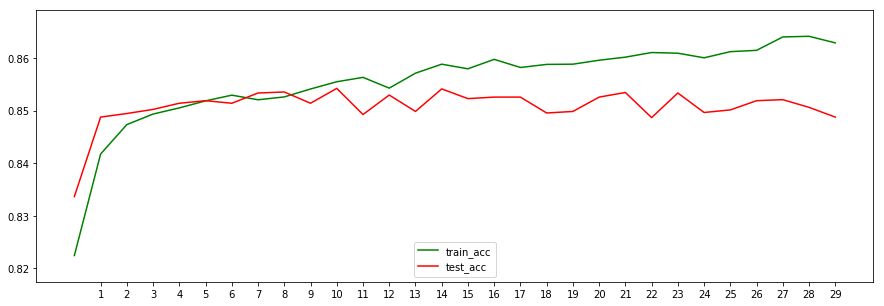

In [83]:
plt.figure(figsize=(15,5))

plt.plot(model.history.history['acc'], label = 'train_acc', color = 'g')
plt.plot(model.history.history['val_acc'], label = 'test_acc', color = 'r')

plt.ylim(bottom = min(model.history.history['acc'] + model.history.history['val_acc']) - 0.005, 
         top = max(model.history.history['acc'] + model.history.history['val_acc']) + 0.005)

plt.xticks(range(min(model.history.epoch) + 1, max(model.history.epoch)+1))

plt.legend(loc = "lower center")

plt.show()

In [84]:
# Evaluate the model

train_loss, train_acc = model.evaluate(X_train_NN, y_train_NN)
test_loss, test_acc = model.evaluate(X_test_NN, y_test_NN)

print('Train acc: %.3f, Test acc: %.3f' % (train_acc, test_acc))

14653/14653 [==============================] - 0s 22us/step
Train acc: 0.861, Test acc: 0.853


In [85]:
# Model 4

In [86]:
# Set up the model
model = Sequential()

# Adding layers
model.add(Dense(64, activation = 'relu', input_shape = (n_cols,) ))
model.add(Dropout(rate=0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

# Model compile
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Early stopping
Early_stopping_monitor = [
            EarlyStopping(patience = 2, min_delta = 0.001),
            #ModelCheckpoint(filepath='./my_nn_model.h5', save_best_only=True)
            #ModelCheckpoint(filepath='weights.{epoch:02d}-{val_loss:.4f}.hdf5', save_best_only=True)            
]

# Fit the model
model.fit(X_train_NN, y_train_NN, validation_split = 0.3, epochs = 30, verbose = 1 )
          #,callbacks = Early_stopping_monitor)

Train on 23932 samples, validate on 10257 samples
Epoch 1/30
23932/23932 [==============================] - 2s 89us/step - loss: 0.4037 - acc: 0.8058 - val_loss: 0.3613 - val_acc: 0.8295
Epoch 2/30
23932/23932 [==============================] - 1s 57us/step - loss: 0.3659 - acc: 0.8279 - val_loss: 0.3470 - val_acc: 0.8338
Epoch 3/30
23932/23932 [==============================] - 1s 57us/step - loss: 0.3529 - acc: 0.8357 - val_loss: 0.3396 - val_acc: 0.8406
Epoch 4/30
23932/23932 [==============================] - 1s 59us/step - loss: 0.3453 - acc: 0.8394 - val_loss: 0.3301 - val_acc: 0.8436
Epoch 5/30
23932/23932 [==============================] - 1s 55us/step - loss: 0.3384 - acc: 0.8407 - val_loss: 0.3248 - val_acc: 0.8479
Epoch 6/30
23932/23932 [==============================] - 1s 59us/step - loss: 0.3348 - acc: 0.8432 - val_loss: 0.3256 - val_acc: 0.8474
Epoch 7/30
23932/23932 [==============================] - 1s 56us/step - loss: 0.3300 - acc: 0.8460 - val_loss: 0.3194 - val_acc

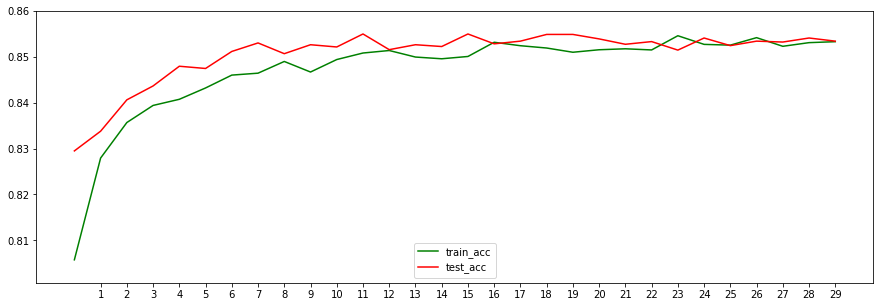

In [87]:
plt.figure(figsize=(15,5))

plt.plot(model.history.history['acc'], label = 'train_acc', color = 'g')
plt.plot(model.history.history['val_acc'], label = 'test_acc', color = 'r')

plt.ylim(bottom = min(model.history.history['acc'] + model.history.history['val_acc']) - 0.005, 
         top = max(model.history.history['acc'] + model.history.history['val_acc']) + 0.005)

plt.xticks(range(min(model.history.epoch) + 1, max(model.history.epoch)+1))

plt.legend(loc = "lower center")

plt.show()

In [88]:
# Evaluate the model

train_loss, train_acc = model.evaluate(X_train_NN, y_train_NN)
test_loss, test_acc = model.evaluate(X_test_NN, y_test_NN)

print('Train acc: %.3f, Test acc: %.3f' % (train_acc, test_acc))

14653/14653 [==============================] - 0s 16us/step
Train acc: 0.857, Test acc: 0.855


In [89]:
# Model 5 

In [90]:
# Set up the model
model = Sequential()

# Adding layers
model.add(Dense(64, activation = 'relu', input_shape = (n_cols,) ))
model.add(Dropout(rate=0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation = 'softmax'))

# Model compile
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Early stopping
Early_stopping_monitor = [
            EarlyStopping(patience = 2, min_delta = 0.001),
            #ModelCheckpoint(filepath='./my_nn_model.h5', save_best_only=True)
            #ModelCheckpoint(filepath='weights.{epoch:02d}-{val_loss:.4f}.hdf5', save_best_only=True)            
]

# Fit the model
model.fit(X_train_NN, y_train_NN, validation_split = 0.3, epochs = 30, verbose = 2 )
          #,callbacks = Early_stopping_monitor)

Train on 23932 samples, validate on 10257 samples
Epoch 1/30
 - 2s - loss: 0.4225 - acc: 0.7948 - val_loss: 0.3726 - val_acc: 0.8317
Epoch 2/30
 - 1s - loss: 0.3849 - acc: 0.8194 - val_loss: 0.3549 - val_acc: 0.8317
Epoch 3/30
 - 1s - loss: 0.3684 - acc: 0.8278 - val_loss: 0.3469 - val_acc: 0.8390
Epoch 4/30
 - 1s - loss: 0.3597 - acc: 0.8329 - val_loss: 0.3377 - val_acc: 0.8397
Epoch 5/30
 - 1s - loss: 0.3522 - acc: 0.8384 - val_loss: 0.3298 - val_acc: 0.8465
Epoch 6/30
 - 1s - loss: 0.3466 - acc: 0.8407 - val_loss: 0.3270 - val_acc: 0.8479
Epoch 7/30
 - 1s - loss: 0.3414 - acc: 0.8420 - val_loss: 0.3228 - val_acc: 0.8504
Epoch 8/30
 - 1s - loss: 0.3362 - acc: 0.8444 - val_loss: 0.3218 - val_acc: 0.8498
Epoch 9/30
 - 1s - loss: 0.3336 - acc: 0.8450 - val_loss: 0.3220 - val_acc: 0.8489
Epoch 10/30
 - 1s - loss: 0.3313 - acc: 0.8466 - val_loss: 0.3186 - val_acc: 0.8532
Epoch 11/30
 - 1s - loss: 0.3343 - acc: 0.8455 - val_loss: 0.3194 - val_acc: 0.8524
Epoch 12/30
 - 1s - loss: 0.3299 - 

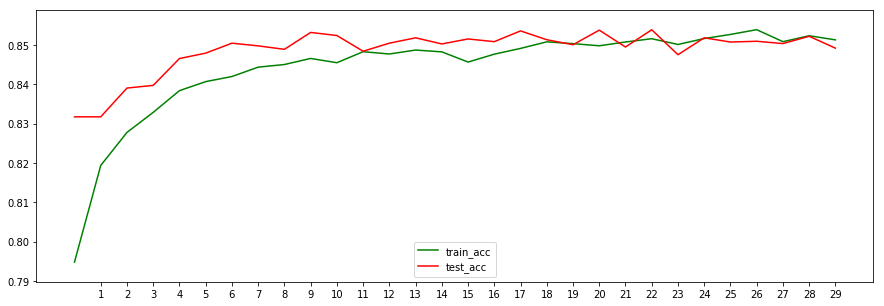

In [91]:
plt.figure(figsize=(15,5))

plt.plot(model.history.history['acc'], label = 'train_acc', color = 'g')
plt.plot(model.history.history['val_acc'], label = 'test_acc', color = 'r')

plt.ylim(bottom = min(model.history.history['acc'] + model.history.history['val_acc']) - 0.005, 
         top = max(model.history.history['acc'] + model.history.history['val_acc']) + 0.005)

plt.xticks(range(min(model.history.epoch) + 1, max(model.history.epoch)+1))

plt.legend(loc = "lower center")

plt.show()

In [92]:
# Evaluate the model

train_loss, train_acc = model.evaluate(X_train_NN, y_train_NN)
test_loss, test_acc = model.evaluate(X_test_NN, y_test_NN)

print('Train acc: %.3f, Test acc: %.3f' % (train_acc, test_acc))

14653/14653 [==============================] - 1s 41us/step
Train acc: 0.855, Test acc: 0.854


** CONCLUSION : The best model is XGBoost :) **